# パッケージインストール

In [ ]:
!pip install -q openai

# APIキー
※シークレットタブに「OPENAI_API_KEY」を設定
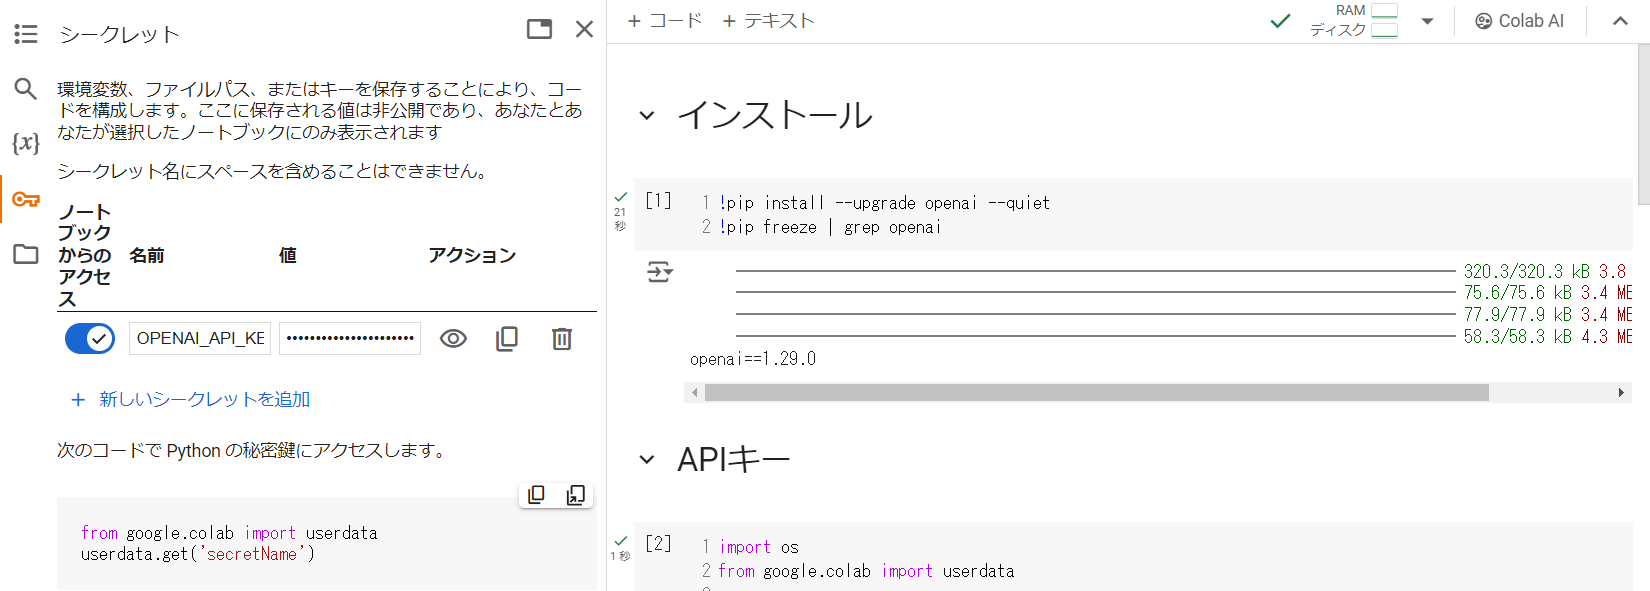

# サンプルスクリプト

In [ ]:
# 画像ダウンロード
!wget https://user0514.cdnw.net/shared/img/thumb/KAZUHIRO171013006_TP_V4.jpg -O test.jpg

--2024-11-14 12:34:29--  https://user0514.cdnw.net/shared/img/thumb/KAZUHIRO171013006_TP_V4.jpg
Resolving user0514.cdnw.net (user0514.cdnw.net)... 172.233.66.71
Connecting to user0514.cdnw.net (user0514.cdnw.net)|172.233.66.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90239 (88K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  88.12K   146KB/s    in 0.6s    

2024-11-14 12:34:31 (146 KB/s) - ‘test.jpg’ saved [90239/90239]



In [ ]:
import os, base64

import cv2
from openai import OpenAI
from google.colab import userdata

# APIキー設定
openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

# 画像をBase64形式に変換
image = cv2.imread('test.jpg')
_, imencode_image = cv2.imencode('.jpg', image)
base64_image = base64.b64encode(imencode_image)
base64_image = f'data:image/jpg;base64,' + base64_image.decode('ascii')

# API実行
openai_client = OpenAI()
response = openai_client.chat.completions.create(
    model='gpt-4o-mini',
    messages=[
        {'role': 'system', 'content': ''},
        {'role': 'user', 'content':
            [{'type': 'text', 'text': 'この画像には何が映っていますか？'},
            {'type': 'image_url', 'image_url': {'url': base64_image}},]
        },
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

この画像には、2匹のハリネズミといくつかの鉢植えのサボテンが映っています。ハリネズミは互いに寄り添っており、鉢植えは金属製で、サボテンが植えられています。背景は明るい色合いの床のようです。
